# Statistical Analysis of Meat Consumption
This notebook provides a statistical analysis of meat consumption trends based on the available data in the dataset.

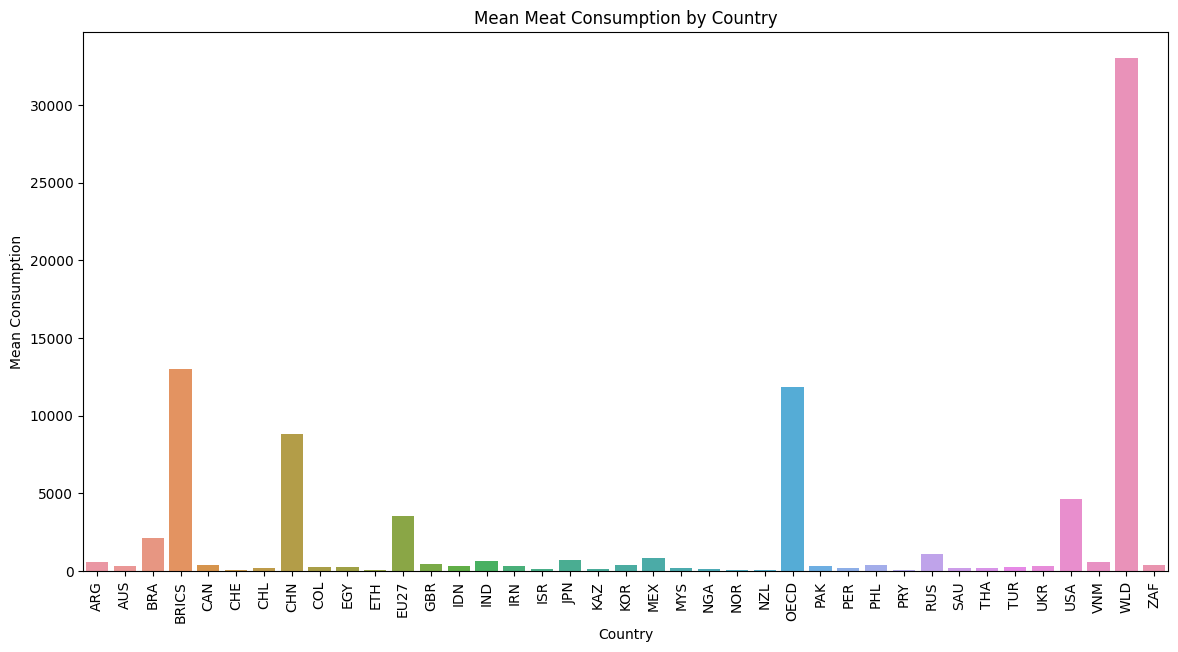

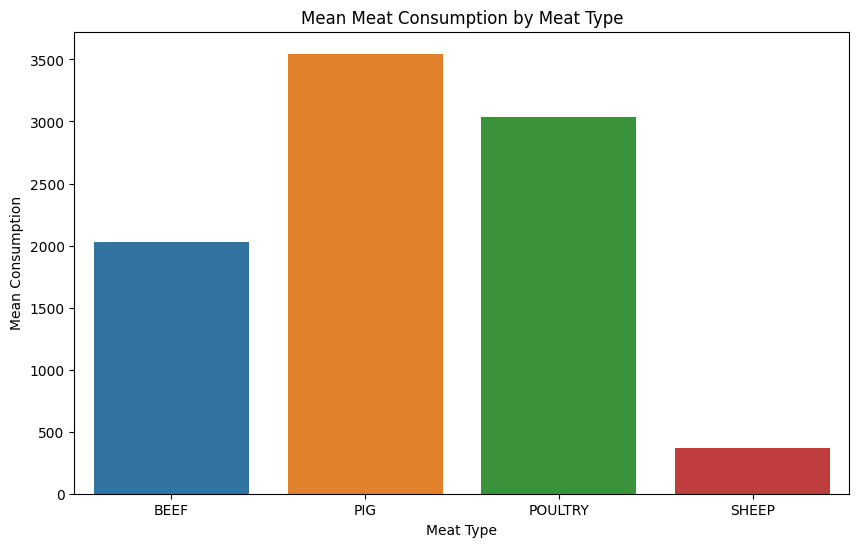

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

df = pd.read_csv('data/world_meat_consumpiton_trends.csv')

# Data Preprocessing
df.dropna(subset=['Value'], inplace=True)
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')

# Statistical Analysis
# Mean and standard deviation of meat consumption by country
country_stats = df.groupby('LOCATION')['Value'].agg(['mean', 'std']).reset_index()
country_stats.columns = ['Country', 'Mean Consumption', 'Standard Deviation']
country_stats

# Mean and standard deviation of meat consumption by meat type
meat_type_stats = df.groupby('SUBJECT')['Value'].agg(['mean', 'std']).reset_index()
meat_type_stats.columns = ['Meat Type', 'Mean Consumption', 'Standard Deviation']
meat_type_stats

# Visualization
# Mean meat consumption by country
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Mean Consumption', data=country_stats)
plt.title('Mean Meat Consumption by Country')
plt.xlabel('Country')
plt.ylabel('Mean Consumption')
plt.xticks(rotation=90)
plt.show()

# Mean meat consumption by meat type
plt.figure(figsize=(10, 6))
sns.barplot(x='Meat Type', y='Mean Consumption', data=meat_type_stats)
plt.title('Mean Meat Consumption by Meat Type')
plt.xlabel('Meat Type')
plt.ylabel('Mean Consumption')
plt.show()

## Detailed Analysis by Meat Type

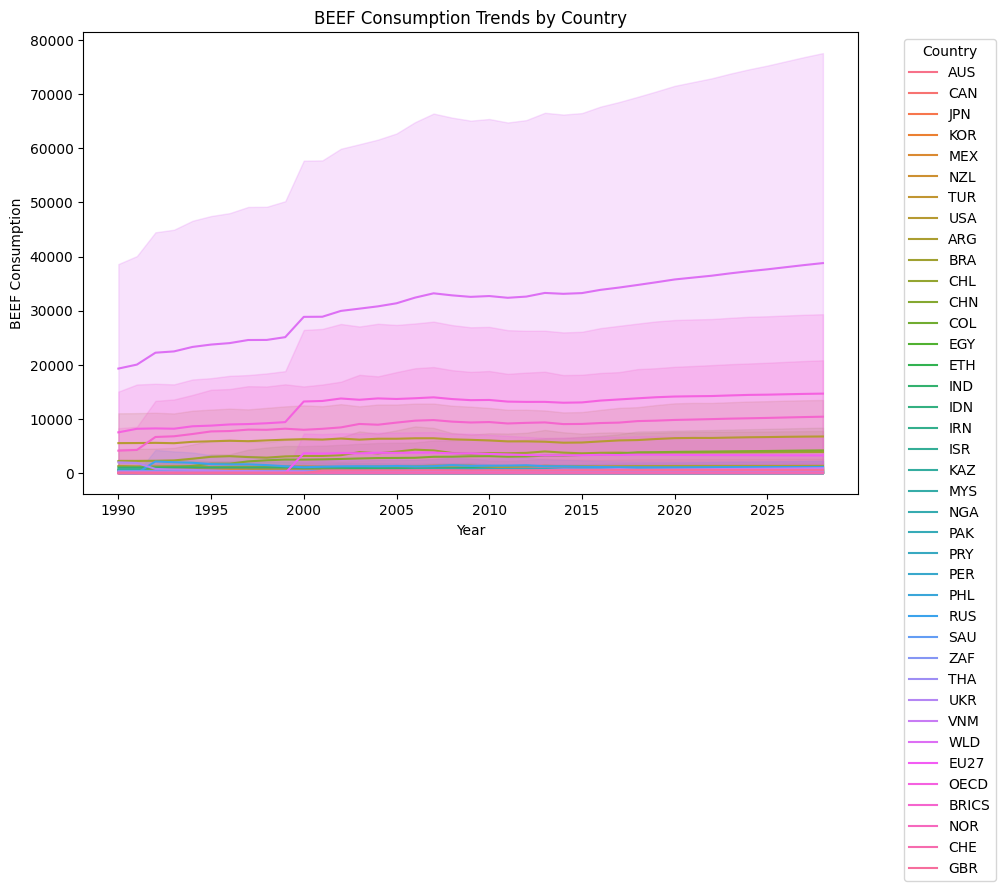

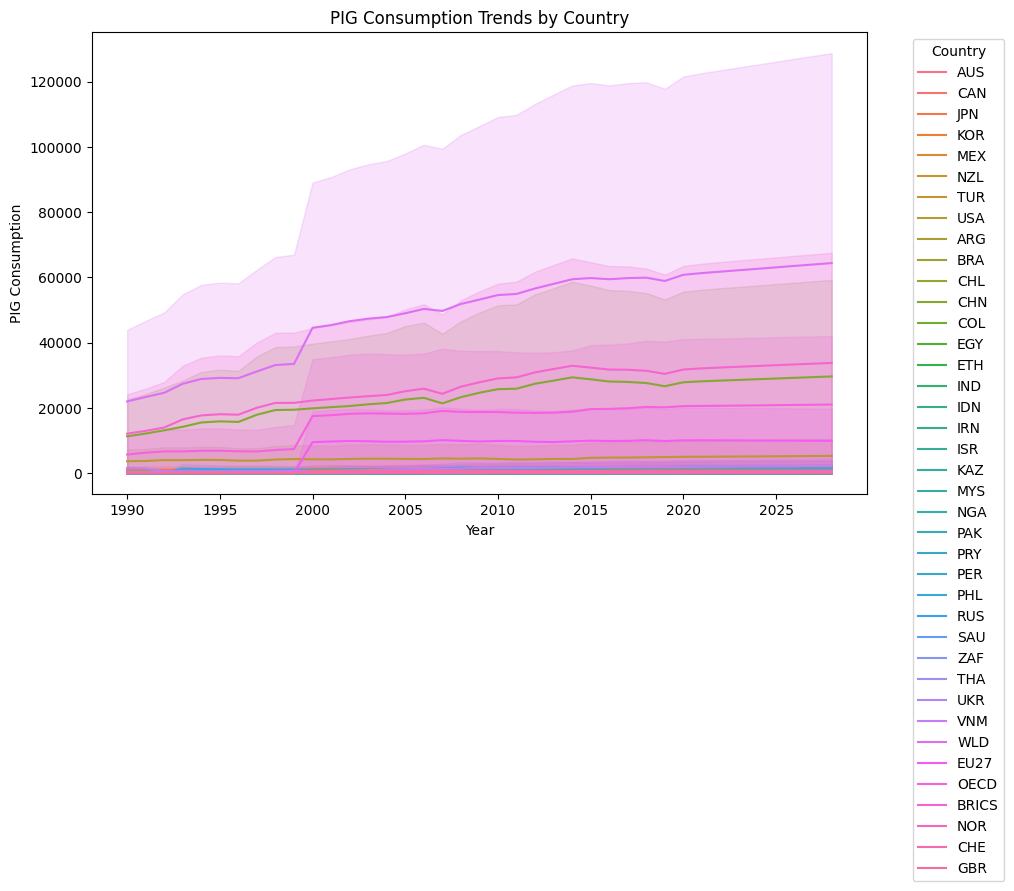

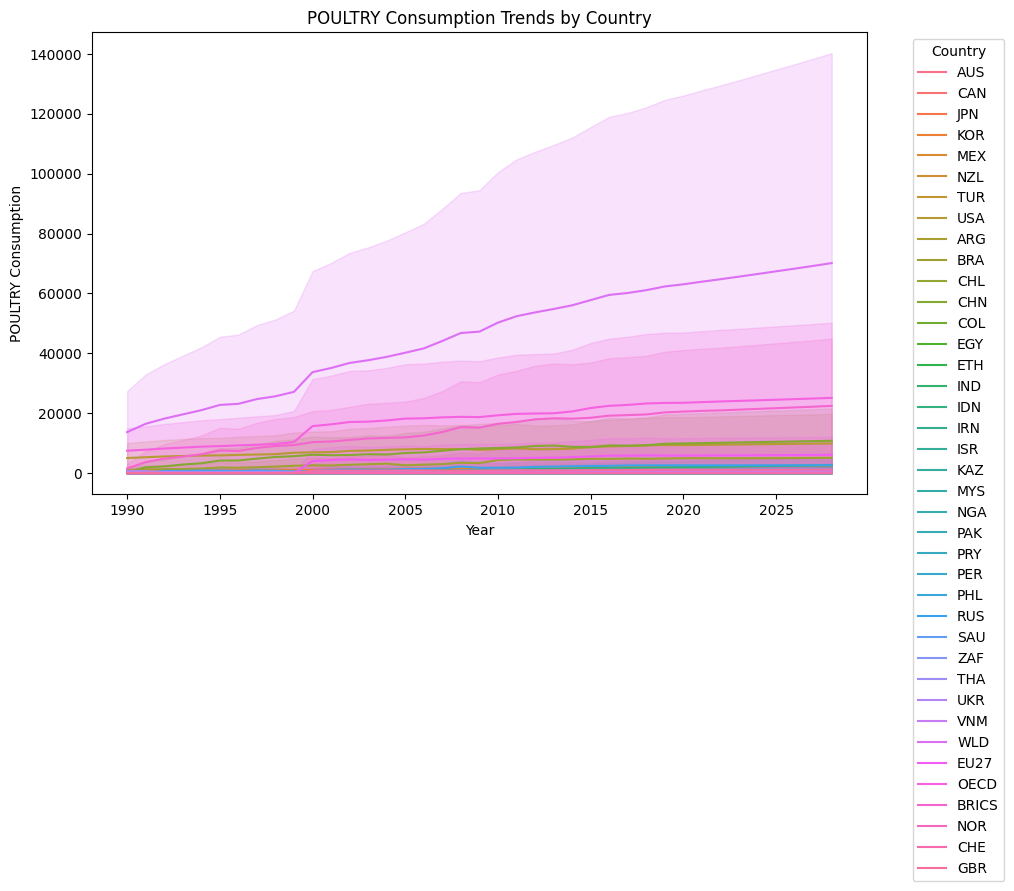

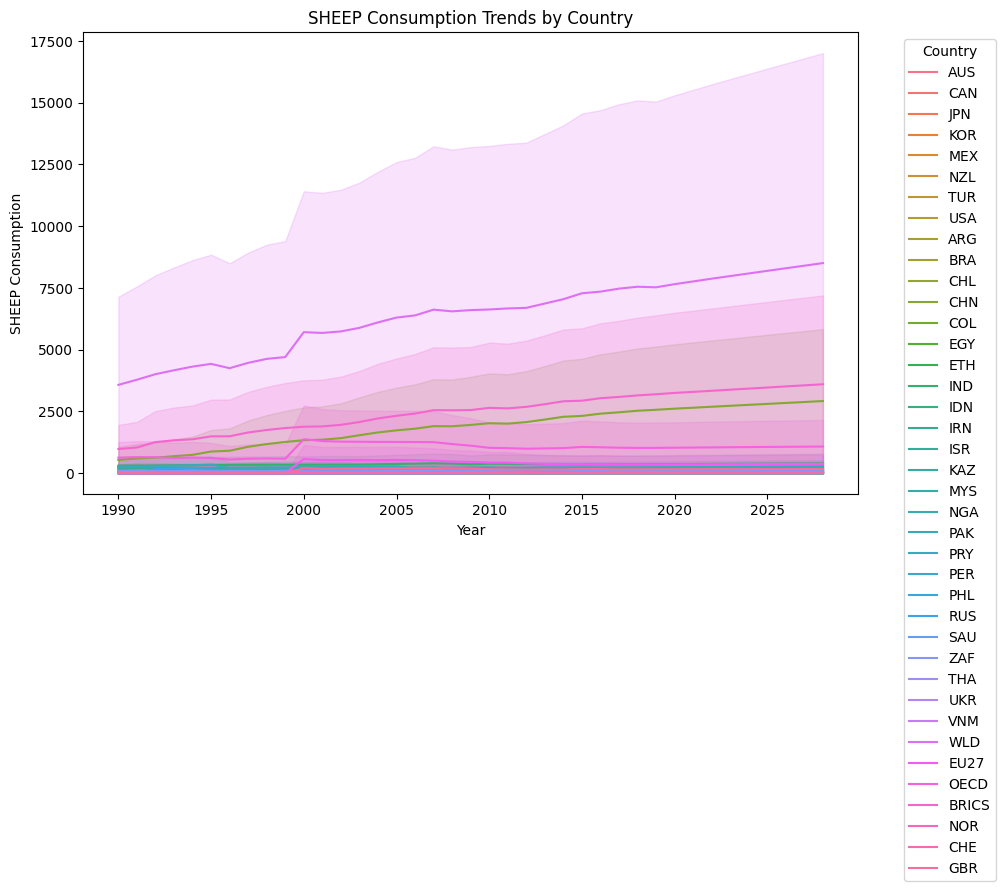

In [8]:
# Detailed analysis for each type of meat
meat_types = df['SUBJECT'].unique()

for meat in meat_types:
    plt.figure(figsize=(10, 6))
    meat_data = df[df['SUBJECT'] == meat]
    sns.lineplot(data=meat_data, x='TIME', y='Value', hue='LOCATION')
    plt.title(f'{meat} Consumption Trends by Country')
    plt.xlabel('Year')
    plt.ylabel(f'{meat} Consumption')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()